## Predicting Flight Delays
### Exploratory Data Analysis
Team: Ali, Khaildyn, Mobola
## Task 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

In [2]:
# Read files
df_flights = pd.read_csv("data/flights.csv")

#### **Task 6**: How many states cover 50% of US air traffic? 

In [3]:
orig_des = df_flights.filter(['origin_city_name', 'dest_city_name', 'fl_date'])
orig_des 

,origin_city_name,dest_city_name,fl_date
0,"Boston, MA","Richmond, VA",2018-05-04
1,"New Orleans, LA","Newark, NJ",2019-12-09
2,"Charlotte, NC","San Antonio, TX",2019-12-20
3,"Atlanta, GA","Portland, ME",2019-07-14
4,"Phoenix, AZ","Boise, ID",2019-04-08
...,...,...,...
195867,"Charlotte, NC","Fort Lauderdale, FL",2019-09-20
195868,"Jacksonville, FL","Chicago, IL",2018-07-27
195869,"Charlotte, NC","Greensboro/High Point, NC",2018-01-23
195870,"Charlotte, NC","Las Vegas, NV",2019-02-06


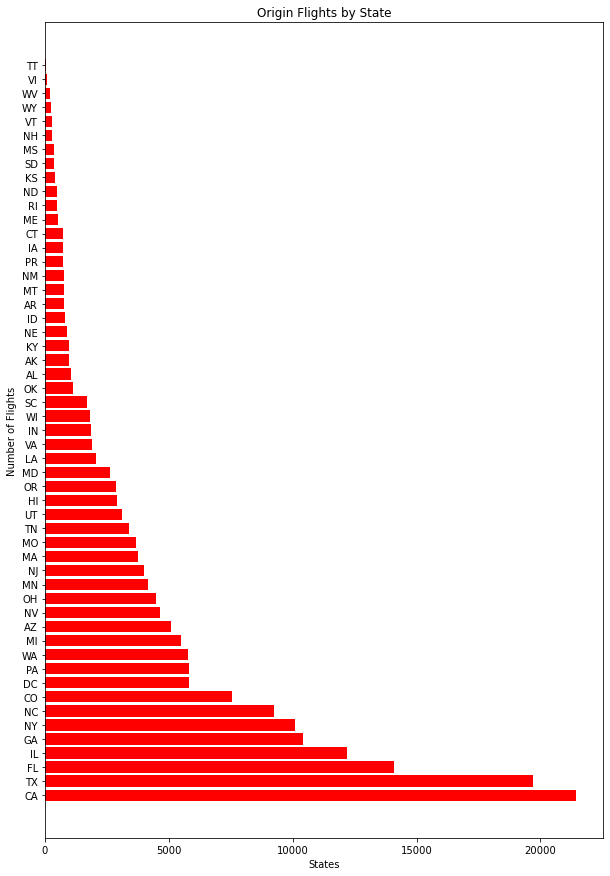

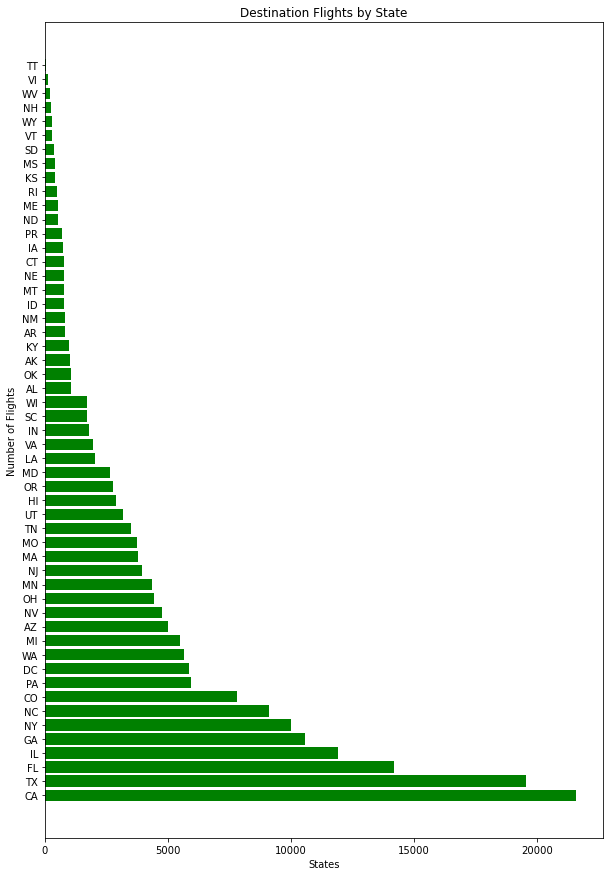

In [4]:
orig_des['origin_state'] = orig_des['origin_city_name'].apply(lambda x: x.split(', ')[1])
orig_des['dest_state'] = orig_des['dest_city_name'].apply(lambda x: x.split(', ')[1])

orig_flights = orig_des.groupby('origin_state')['fl_date'].count().sort_values(ascending=False)
dest_flights = orig_des.groupby('dest_state')['fl_date'].count().sort_values(ascending=False)


plt.barh(orig_flights.index,orig_flights.values,  color='red')
plt.xlabel("States")
plt.ylabel("Number of Flights")
plt.title("Origin Flights by State")
fig = plt.gcf()
fig.set_size_inches(10, 15)
plt.show()

plt.barh(dest_flights.index,dest_flights.values,  color='green')
plt.xlabel("States")
plt.ylabel("Number of Flights")
plt.title("Destination Flights by State")
fig = plt.gcf()
fig.set_size_inches(10, 15)
plt.show()